#**Análise e tratamento de dados**

In [1]:
import pandas as pd

In [3]:
#Carregando os arquivos
df1 = pd.read_excel("/content/Aracaju.xlsx")
df2 = pd.read_excel("/content/Fortaleza.xlsx")
df3 = pd.read_excel("/content/Natal.xlsx")
df4 = pd.read_excel("/content/Recife.xlsx")
df5 = pd.read_excel("/content/Salvador.xlsx")

In [4]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [5]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [6]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [7]:
df["Vendas"].fillna(0, inplace=True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.dropna(subset=["Vendas"], inplace=True)

In [10]:
df.dropna(how="all", inplace=True)

In [12]:
#Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [13]:
df["Data"] = df["Data"].astype("int64")

In [14]:
df["Data"] = pd.to_datetime(df["Data"])

In [15]:
#Criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [16]:
#Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

#**Relatório de vendas**

In [17]:
#Importando a Biblioteca
import matplotlib.pyplot as plt
plt.style.use("dark_background")

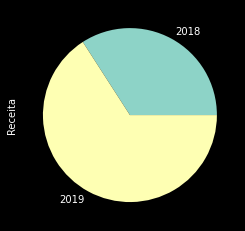

In [29]:
#Receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()



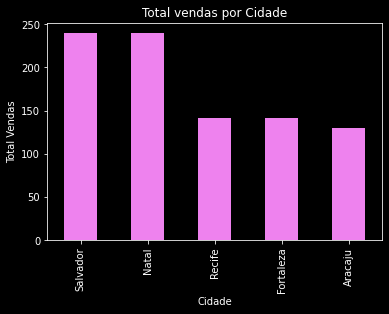

In [32]:
#Total de vendas por cidade
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color = "violet")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

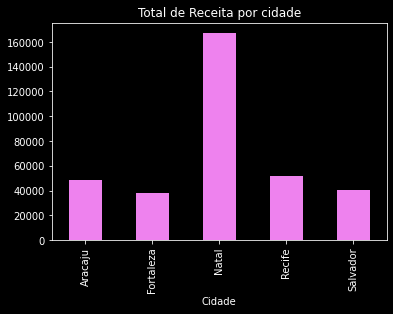

In [34]:
#Receita por cidade
df.groupby("Cidade")["Receita"].sum().plot.bar(title = "Total de Receita por cidade", color = "violet")

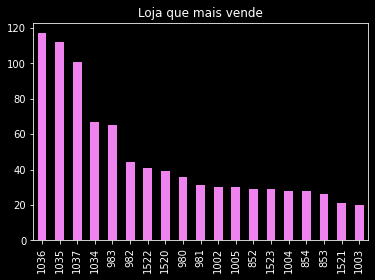

In [38]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar(title = "Loja que mais vende", color = "violet")

In [41]:
#Total de vendas do melhor ano
df_2019 = df[df["Ano_Venda"] == 2019]

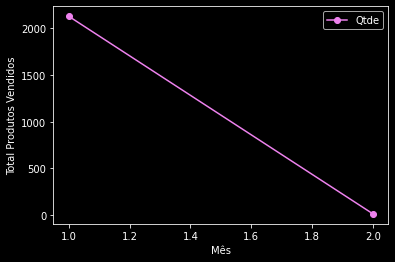

In [44]:
#Total produtos vendidos no melhor trimestre
df_2019.groupby(df_2019["trimestre_venda"])["Qtde"].sum().plot(marker = "o", color = "violet")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

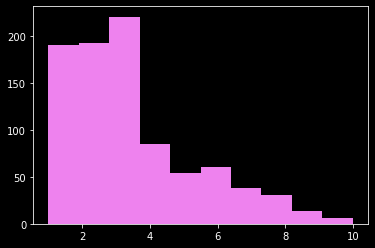

In [45]:
#Hisograma dos produtos vendidos
plt.hist(df["Qtde"], color="violet");

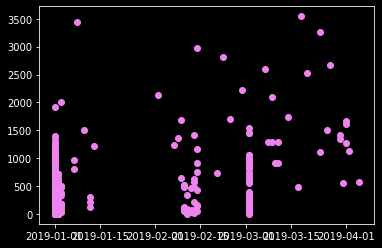

In [51]:
#Receitas ao longo do tempo
plt.scatter(x=df_2019["Data"], y = df_2019["Receita"], color = "violet");